In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pyro import Pyro

## Problem 2

#### Part a)

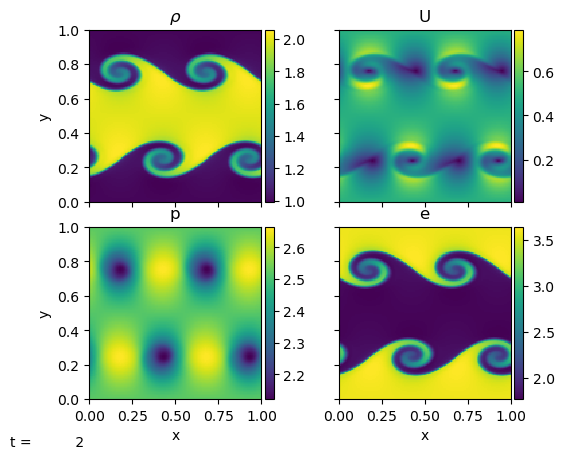

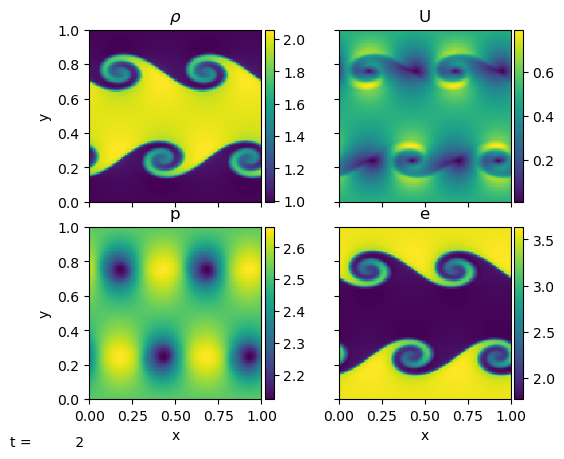

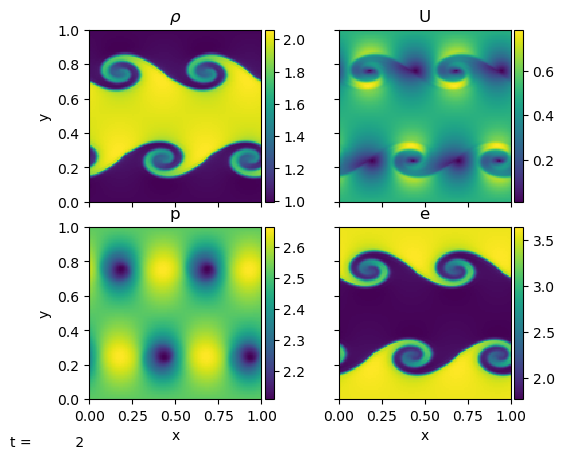

warning, key: compressible.limiter not defined


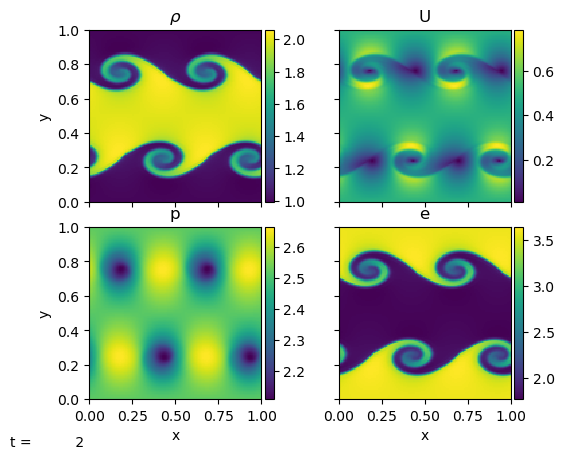

<Figure size 640x480 with 0 Axes>

In [50]:
# the latest version of the package has different default parameters, so
# I set them here to match what's in the code example from the documentation
# linked in the problem statement
solvers = ['', '_rk', '_fv4', '_sdc']
for solver in solvers:
    p = Pyro("compressible"+solver)
    parameters = {'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128}
    p.initialize_problem("kh", inputs_dict=parameters)
    p.run_sim()
    p.sim.dovis()

All of the solvers do pretty well in this default case, with low relative velocities.

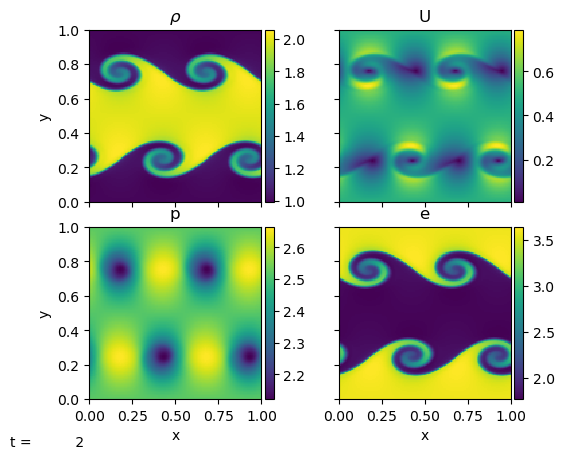

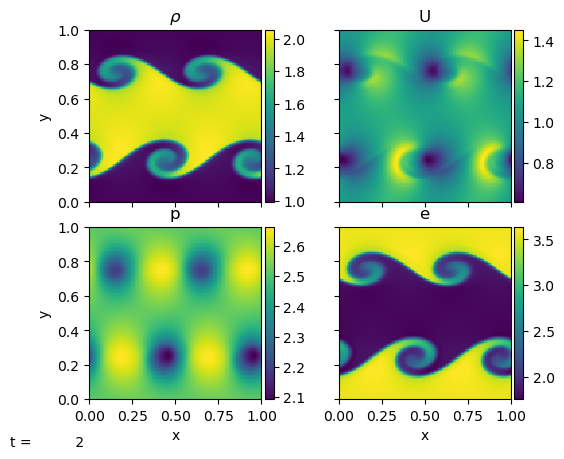

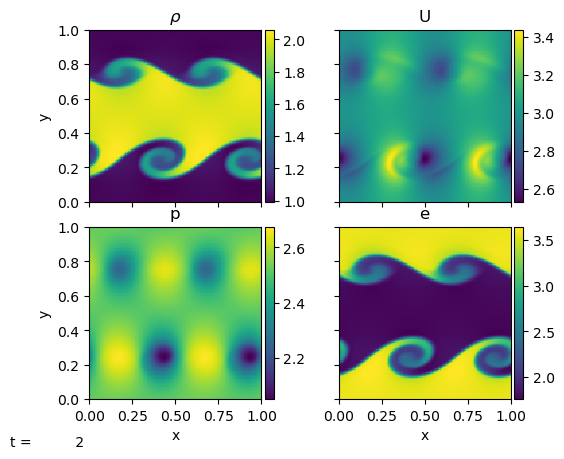

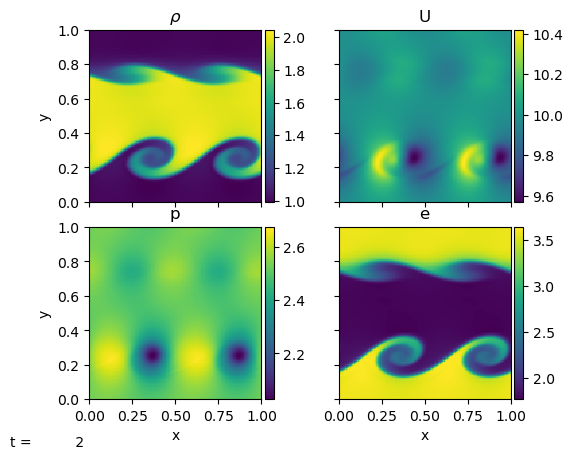

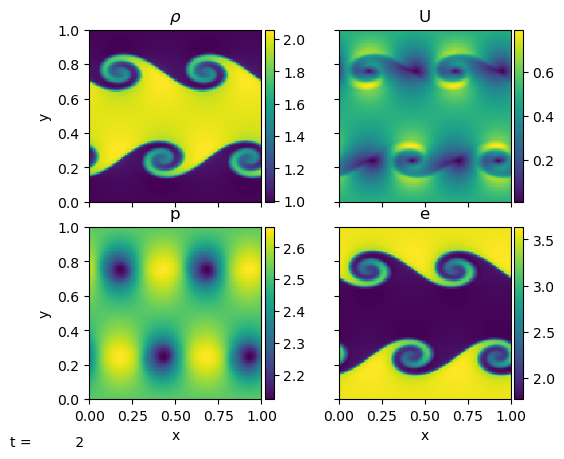

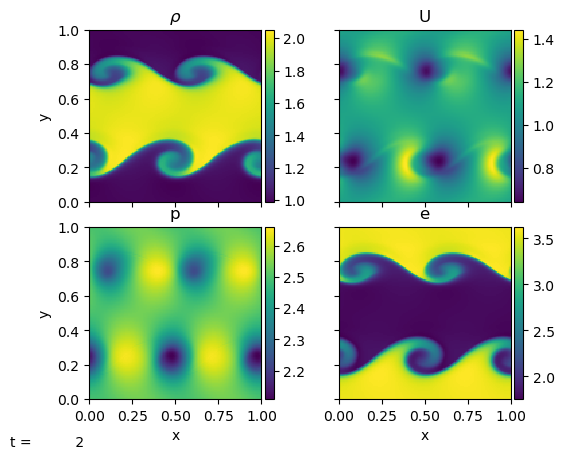

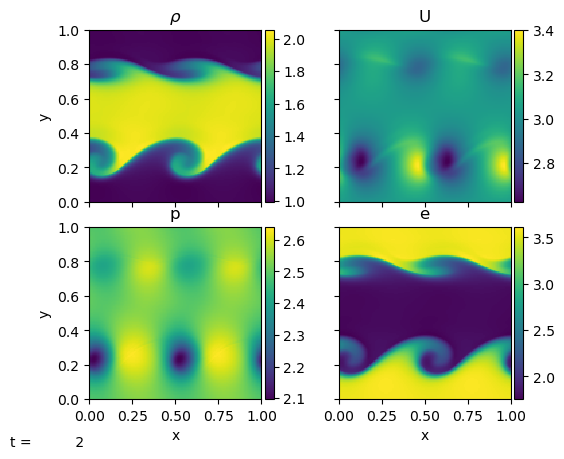

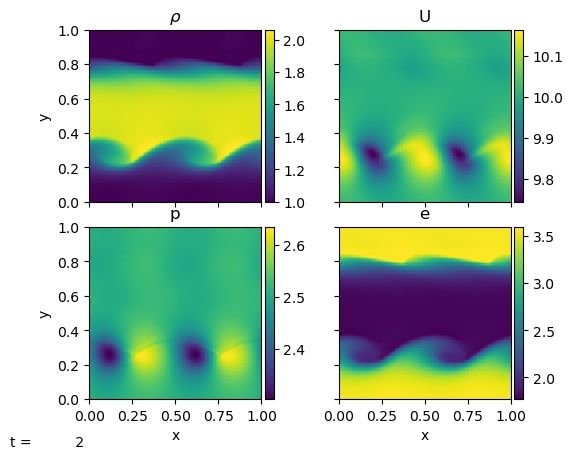

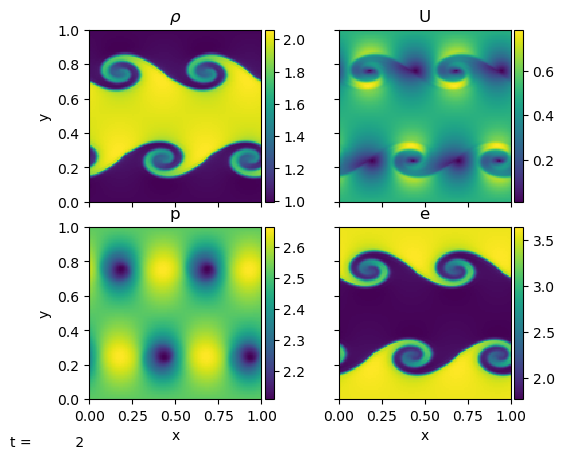

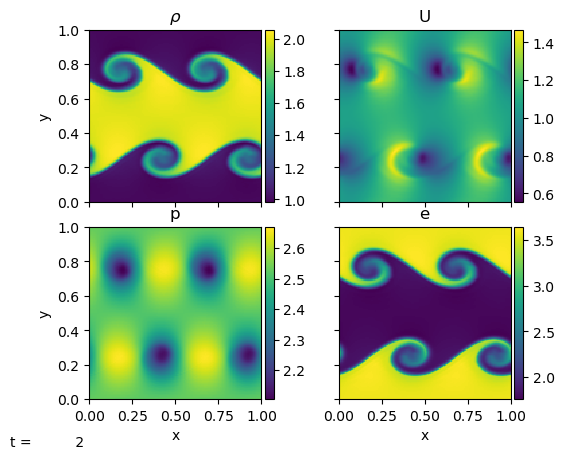

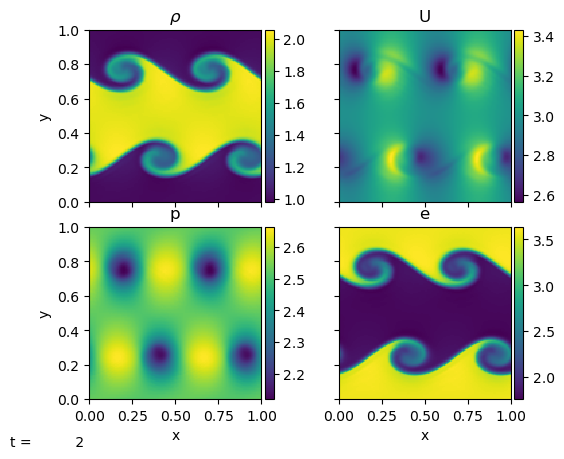

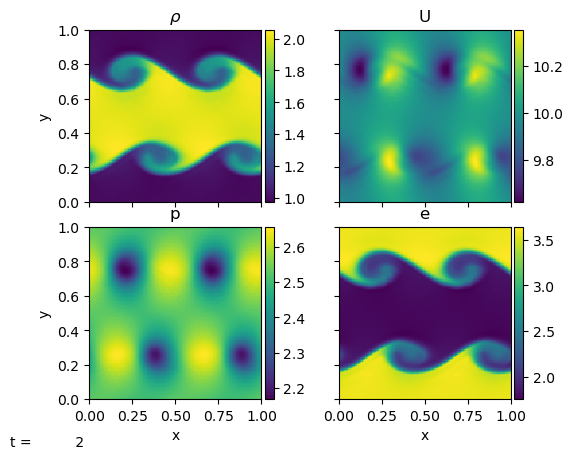

warning, key: compressible.limiter not defined


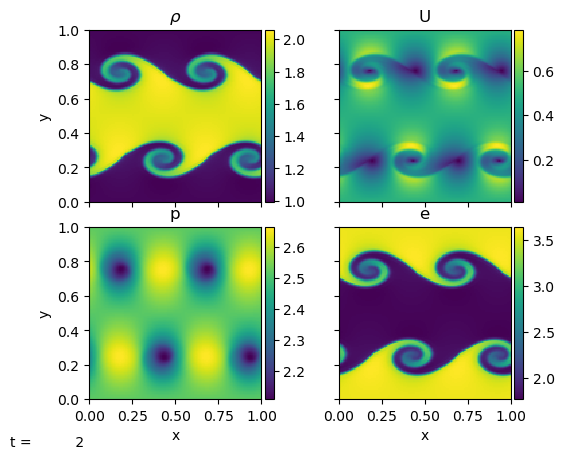

warning, key: compressible.limiter not defined


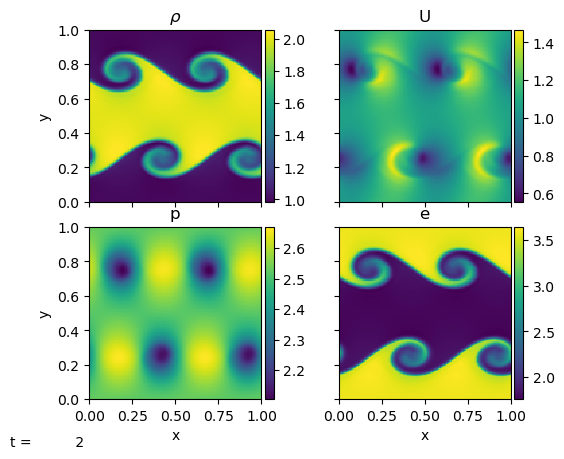

warning, key: compressible.limiter not defined


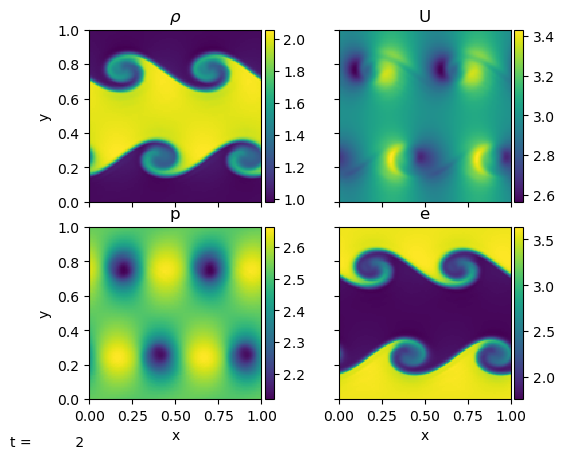

warning, key: compressible.limiter not defined


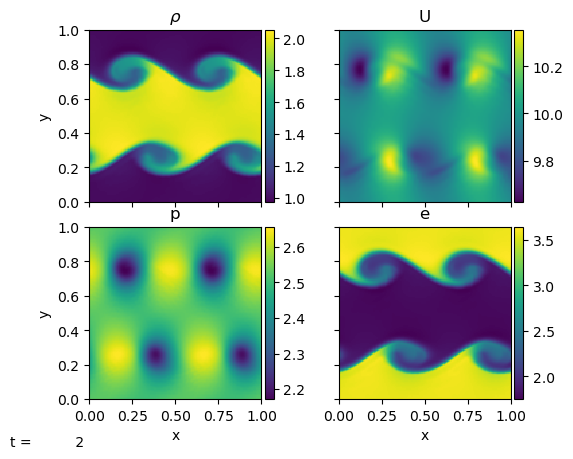

<Figure size 640x480 with 0 Axes>

In [52]:
# to match the code guide, run the solvers for the different values of
# bulk velocity (velocity in the y-axis direction)
solvers = ['', '_rk', '_fv4', '_sdc']
bulk_vs = [0, 1, 3, 10]
for solver in solvers:
    for bulk_v in bulk_vs:
        p = Pyro("compressible"+solver)
        parameters = {'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128,
                      'kh.bulk_velocity': bulk_v}
        p.initialize_problem("kh", inputs_dict=parameters)
        p.run_sim()
        p.sim.dovis()


The plots above are in batches of 4, with each group of 4 being generated by a single solver. \
First group of 4: compressible \
Second group of 4: compressible_rk \
Third group of 4: compressible_fv4 \
Last group of 4: compressible_sdc

Within each group of four, the bulk velocity (velocity in the y-direction) is increasing. From my understanding, this shouldn't affect the result, since the entire fluid is moving together, but I'm guessing that this has some impacts on the numerical instability of the problem (eg. no longer satisfying Courant condition (foreshadowing)).

In general, the latter two of the four methods seem to do the best with a large bulk velocity.

#### Part b)

Now I repeat the exact same setup as above, but with a relative velocity of 20 instead of 1

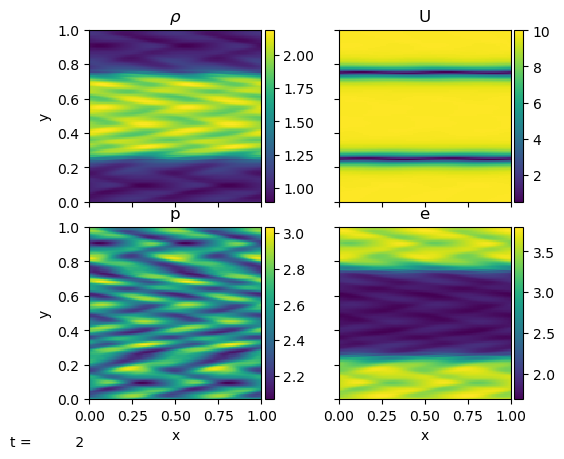

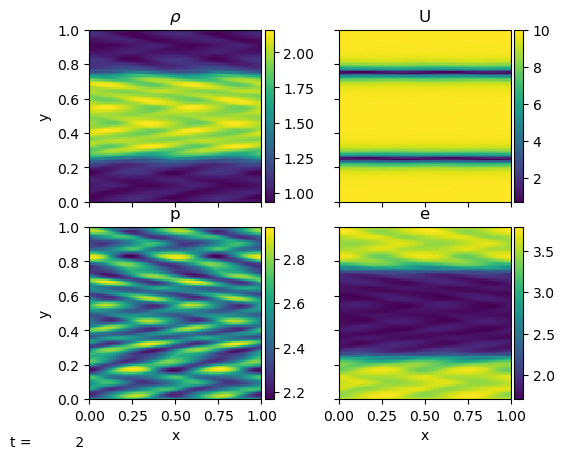

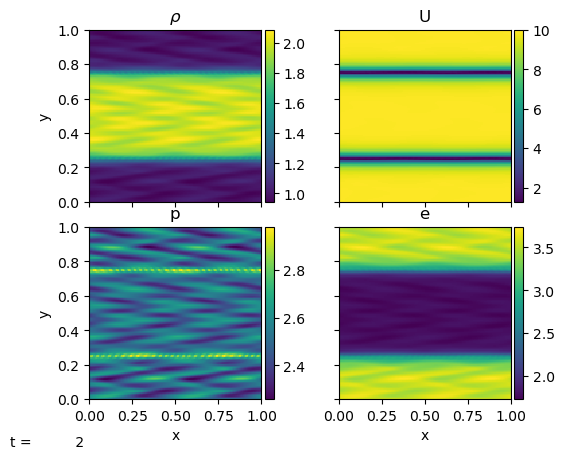

warning, key: compressible.limiter not defined


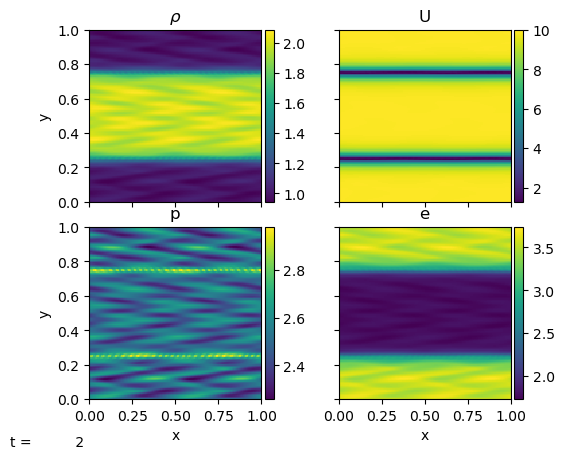

<Figure size 640x480 with 0 Axes>

In [51]:
# run the test with 0 bulk velocity again, but this time with relative
# velocities of +- 10 instead of the 1 rel. velocity from before
solvers = ['', '_rk', '_fv4', '_sdc']
for solver in solvers:
    p = Pyro("compressible"+solver)
    parameters = {'kh.u_1': -10, 'kh.u_2': 10, 'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128}
    p.initialize_problem("kh", inputs_dict=parameters)
    p.run_sim()
    p.sim.dovis()

These results are pretty bizarre. One would definitely expect the results to appear different in this case than the above one - after all, we already saw a pretty strong instabiliy by t=2 in the previous case, and the velocity here is much, much higher. 

Naively, I would expect that a higher velocity should drive even stronger instabilities, causing the fluids to mix significantly. In this case, the fluids are hardly mixed at all, which is contrary to my expectation.

However, there is also an effect from viscosity - I have read online that viscosity can sometimes suppress the formation of instabilities at high enough velocities. This might explain what we see. On the other hand, our simulation may not have sufficient resolution in time/space. In particular, increasing the velocity to a huge number might violate something like the Courant condition.

Before I test this, I'll run the simulation again but for varying bulk velocities in the y-direction as well.

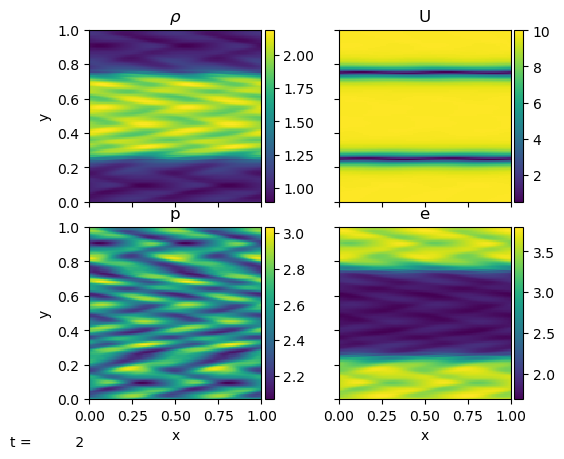

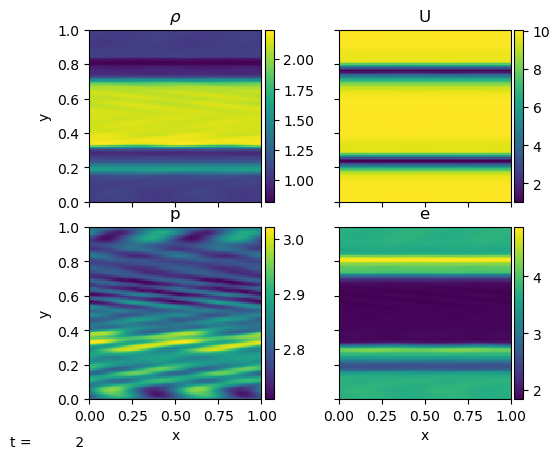

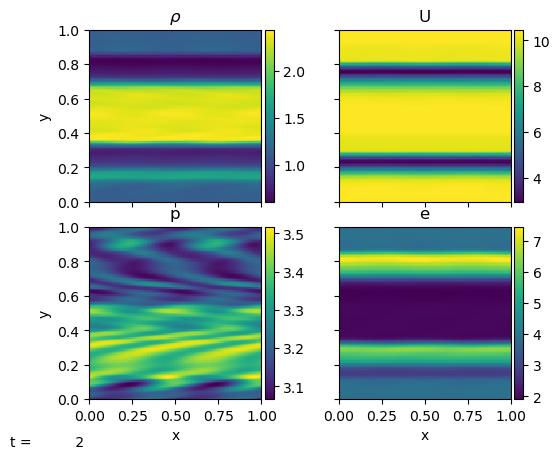

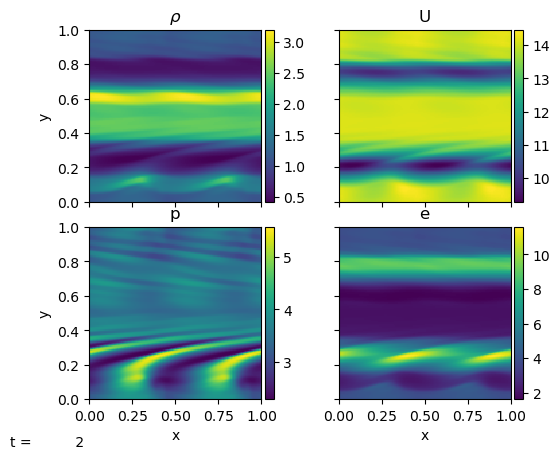

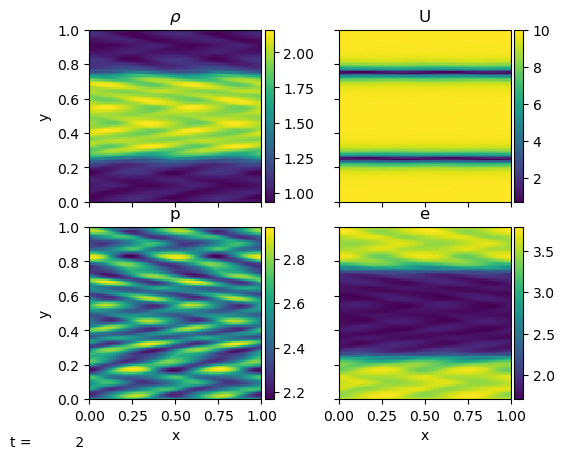

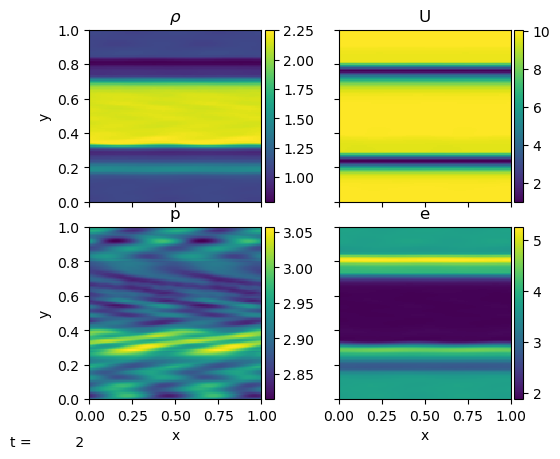

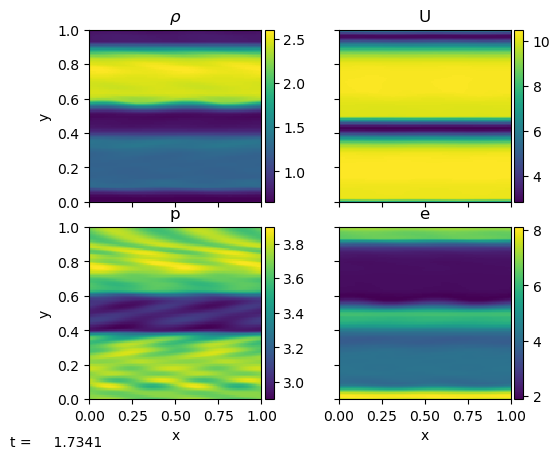

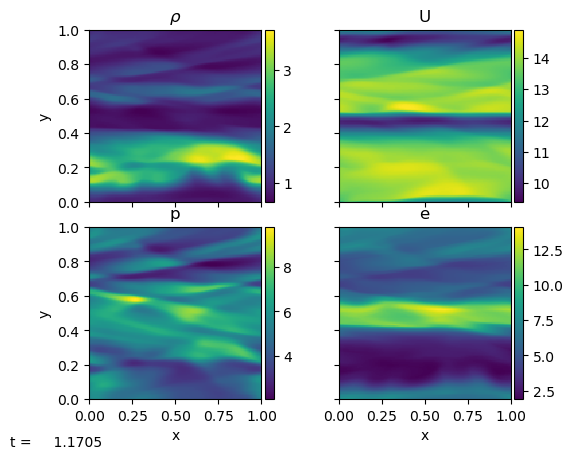

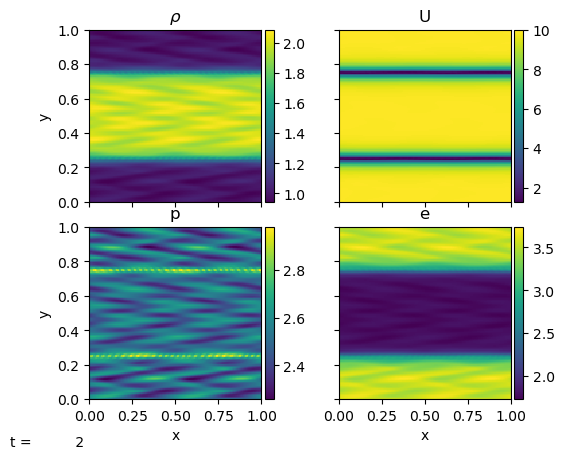

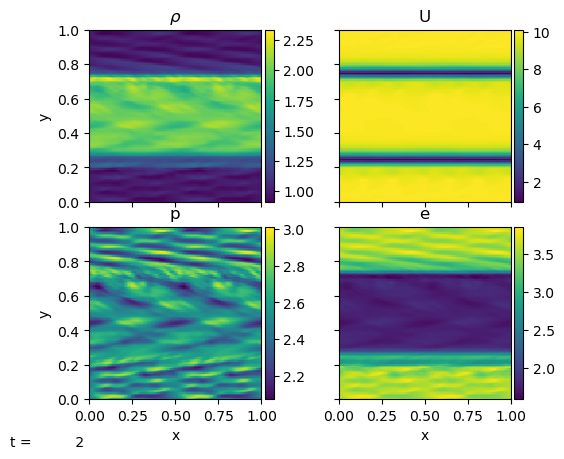

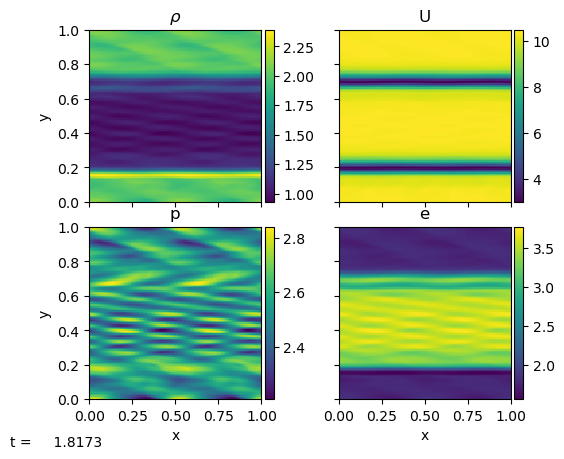

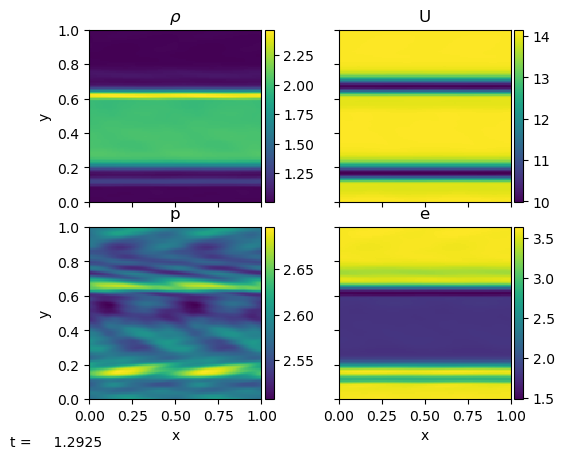

warning, key: compressible.limiter not defined


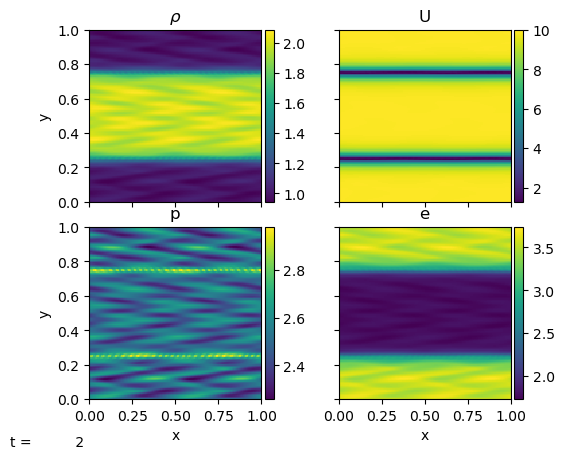

warning, key: compressible.limiter not defined


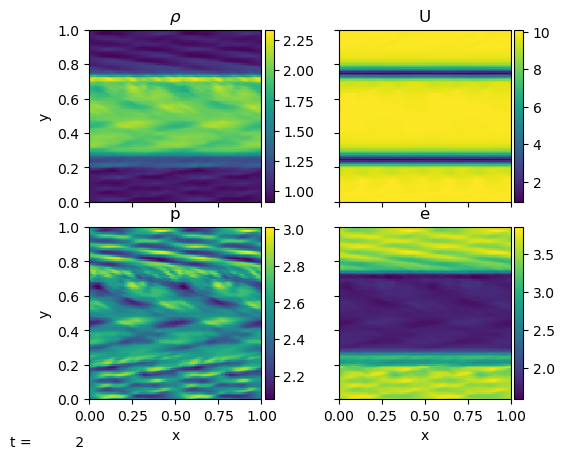

warning, key: compressible.limiter not defined


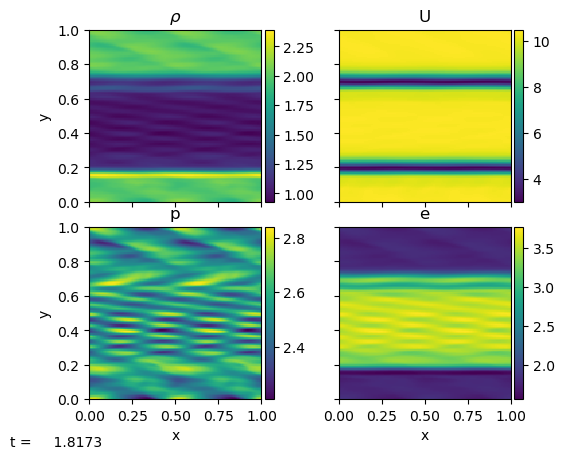

warning, key: compressible.limiter not defined


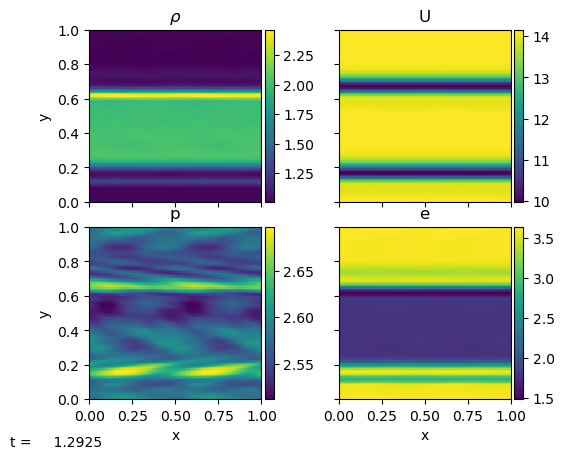

<Figure size 640x480 with 0 Axes>

In [ ]:
# to match the code guide, run the solvers for the different values of
# bulk velocity (velocity in the y-axis direction)
solvers = ['', '_rk', '_fv4', '_sdc']
bulk_vs = [0, 1, 3, 10]
for solver in solvers:
    for bulk_v in bulk_vs:
        p = Pyro("compressible"+solver)
        parameters = {'kh.u_1': -10, 'kh.u_2': 10, 'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128,
                      'kh.bulk_velocity': bulk_v}
        p.initialize_problem("kh", inputs_dict=parameters)
        p.run_sim()
        p.sim.dovis()


These are some pretty interesting results. I honestly don't really know how to interpret these - in some cases, within the same solver, the fluids seem to almost "invert", which I think is actually due to a y-axis offset due to instability in the bulk velocity computation. This seems to reinforce the idea that we're violating a Courant condition, or otherwise that we're suffering due to a lack of spatial/time resolution. To test this out, let's try running with some intermediate relative velocity values.

#### Extras

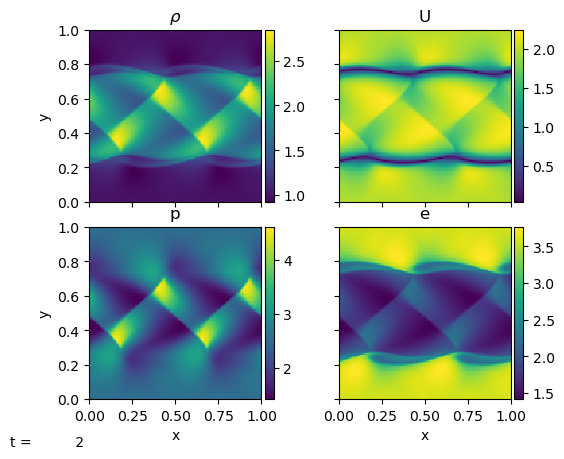

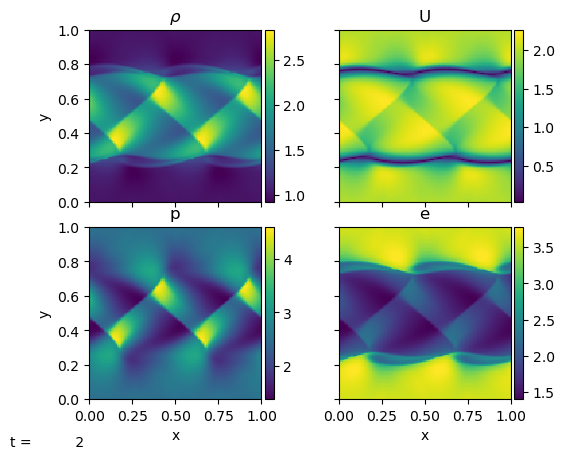

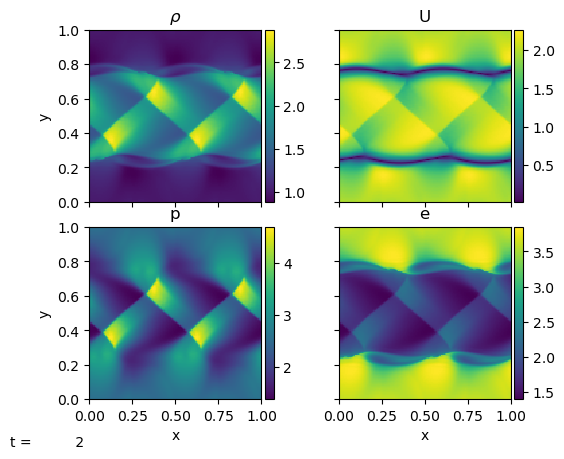

warning, key: compressible.limiter not defined


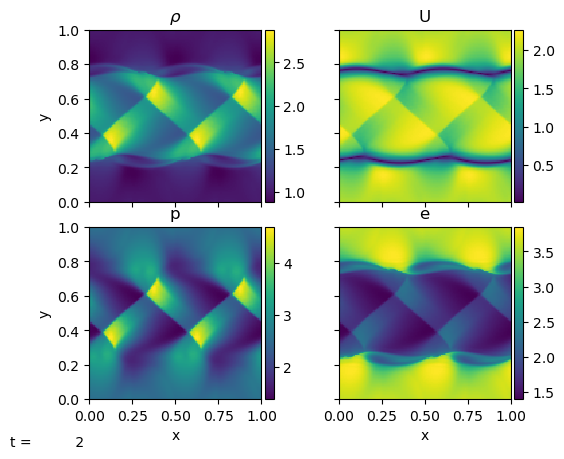

<Figure size 640x480 with 0 Axes>

In [ ]:
# Same simulations but with a relative velocity of 4 instead of 1
solvers = ['', '_rk', '_fv4', '_sdc']
for solver in solvers:
    p = Pyro("compressible"+solver)
    parameters = {'kh.u_1': -2, 'kh.u_2': 2, 'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128}
    p.initialize_problem("kh", inputs_dict=parameters)
    p.run_sim()
    p.sim.dovis()

Looks like the velocity is still too high, but this is interesting! If you squint, you can almost see the shadow of an instability somewhere in there.

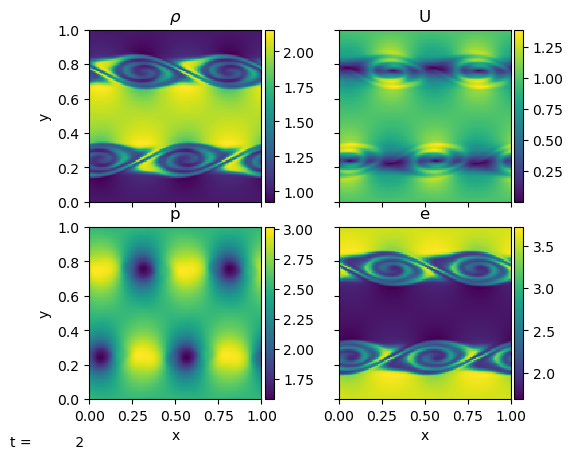

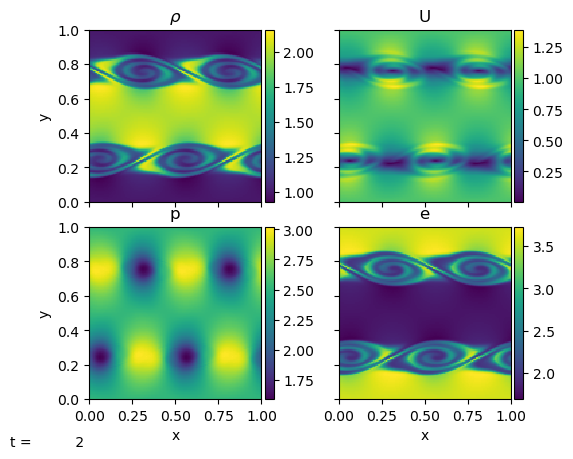

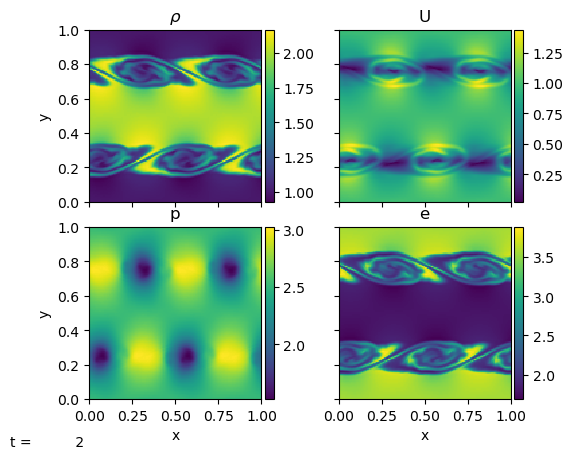

warning, key: compressible.limiter not defined


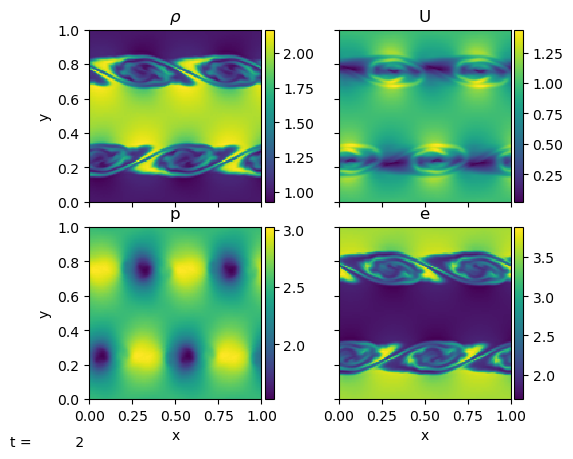

<Figure size 640x480 with 0 Axes>

In [ ]:
# Same simulations but with a relative velocity of 2 instead of 1
solvers = ['', '_rk', '_fv4', '_sdc']
for solver in solvers:
    p = Pyro("compressible"+solver)
    parameters = {'kh.u_1': -1, 'kh.u_2': 1, 'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128}
    p.initialize_problem("kh", inputs_dict=parameters)
    p.run_sim()
    p.sim.dovis()

Now I get the expected behavior. When we double the relative velocity compared to the very first run, we get much stronger intabilities (for the same run time). The instabilities already appear a bit shaky for some of these solvers, though, which might suggest that we were right about our issues with the v=+-10 case being a problem with numerical accuracy rather than an inherent behavior of the problem.

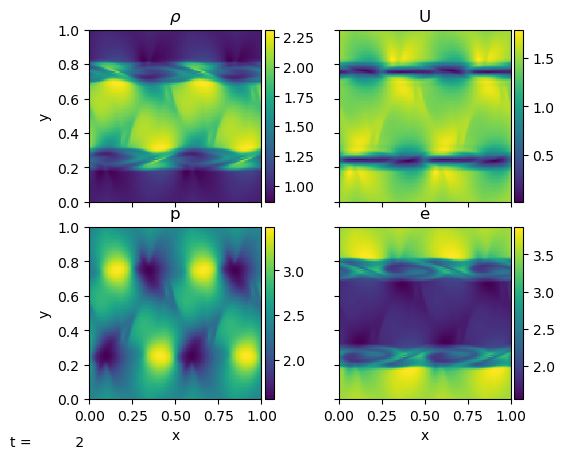

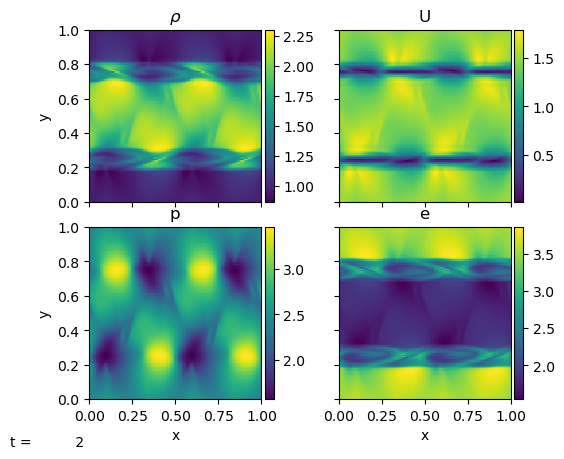

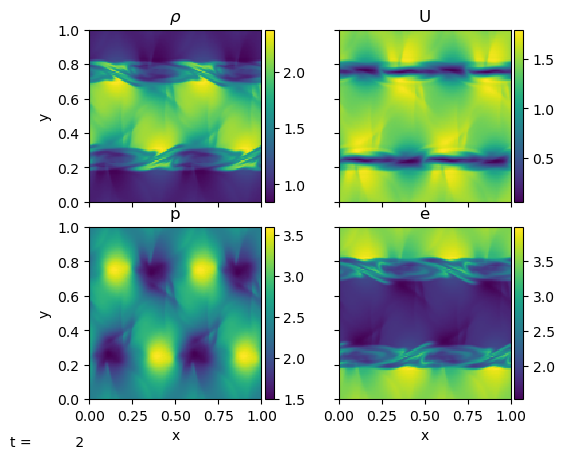

warning, key: compressible.limiter not defined


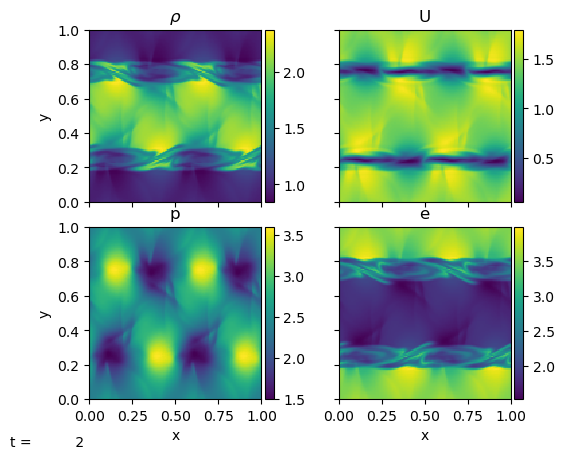

<Figure size 640x480 with 0 Axes>

In [ ]:
# Same simulations but with a relative velocity of 3 instead of 1
solvers = ['', '_rk', '_fv4', '_sdc']
for solver in solvers:
    p = Pyro("compressible"+solver)
    parameters = {'kh.u_1': -1.5, 'kh.u_2': 1.5, 'eos.gamma': 1.7, 'mesh.nx': 128, 'mesh.ny': 128}
    p.initialize_problem("kh", inputs_dict=parameters)
    p.run_sim()
    p.sim.dovis()

It seems like relative velocities of +-1.5 is about the borderline for what works.